# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members:
    Cyrus(Hongyi) Hu

• Student Numbers of all Group member: 
84254937

• Group number (from Canvas):25


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

#personal use
import re
import random


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [2]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

In [3]:
#view the data
fulldf.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty  FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0        219  2013     61518.0           72639.0           31250.0   
1        226  2016     84306.0           97321.0           93750.0   
2      13216  2020     78326.0           87235.0           50535.0   
3       2165  2050     51012.0           92647.0           73661.0   
4         36  2060     79750.0           88000.0               NaN   

   Med_Income_Nat_Am  ...  M_Without  F_With  F_Without  All_With  \
0            54750.0  ...       1317     566        540      1442   
1            48750.0  ...        769    1707        564      4177   
2            53935.0  ...      23245  122426      21393    243173   
3            41594.0  ...       2708    6627       1774     13023   
4            63333.0  ...        124     349         67       768   

   All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
0         1857               *         3 or fewer             *   
1         1333               *         3 or fewer             *   
2        44638            61.5                131        stable   
3         4482            62.7                  6        stable   
4          191               *         3 or fewer             *   

  Mortality_Rate Avg_Ann_Deaths  
0              *              *  
1              *              *  
2           47.3             96  
3           58.3              5  
4              *              *  

[5 rows x 23 columns]

In [4]:
#view column indices
fulldf.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Med_Income_Hispanic',
       'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

In [5]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                3134 non-null   object 
 1   AreaName             3134 non-null   object 
 2   All_Poverty          3134 non-null   int64  
 3   M_Poverty            3134 non-null   int64  
 4   F_Poverty            3134 non-null   int64  
 5   FIPS                 3134 non-null   int64  
 6   Med_Income           3133 non-null   float64
 7   Med_Income_White     3132 non-null   float64
 8   Med_Income_Black     1924 non-null   float64
 9   Med_Income_Nat_Am    1474 non-null   float64
 10  Med_Income_Asian     1377 non-null   float64
 11  Med_Income_Hispanic  2453 non-null   float64
 12  M_With               3134 non-null   int64  
 13  M_Without            3134 non-null   int64  
 14  F_With               3134 non-null   int64  
 15  F_Without            3134 non-null   i

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [6]:
#check dtype
fulldf.dtypes

State                   object
AreaName                object
All_Poverty              int64
M_Poverty                int64
F_Poverty                int64
FIPS                     int64
Med_Income             float64
Med_Income_White       float64
Med_Income_Black       float64
Med_Income_Nat_Am      float64
Med_Income_Asian       float64
Med_Income_Hispanic    float64
M_With                   int64
M_Without                int64
F_With                   int64
F_Without                int64
All_With                 int64
All_Without              int64
Incidence_Rate          object
Avg_Ann_Incidence       object
Recent_Trend            object
Mortality_Rate          object
Avg_Ann_Deaths          object
dtype: object

In [7]:
fulldf = fulldf.astype({'FIPS':'str'})
fulldf['FIPS'] = fulldf['FIPS'].str.pad(width = 5, side = 'left', fillchar = '0')

### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [8]:
#Remove
def remove_null(df, threshold = 0.2):
    '''
    Remove columns that are missing more than 20% values
    '''
    percentage = df.isnull().mean()
    columns = percentage[percentage > threshold].index
    print(columns)
    return df.drop(columns,axis = 1)
fulldf_modified = remove_null(fulldf)

Index(['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian',
       'Med_Income_Hispanic'],
      dtype='object')


In [9]:
#Justification by getting the proportion that is null values
print(fulldf['Med_Income_Black'].isnull().mean())
print(fulldf['Med_Income_Nat_Am'].isnull().mean())
print(fulldf['Med_Income_Asian'].isnull().mean())
print(fulldf['Med_Income_Hispanic'].isnull().mean())

0.3860880663688577
0.5296745373324825
0.5606253988513082
0.21729419272495215


### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

I believe now `Incidence_Rate`, `Avg_Ann_Incidence`, and `Avg_Ann_Deaths` columns are in unexpected format. These have to be numeric, either in float or in integer. As stated in the description file, these columns are rates and occurance. Also, when inspecting the dataframe, I found unless it is specified as special cases, for example, `*`, `3 or fewer`, `_`, and `__`; they are all numbers. I have to figure out a way to manipulate these string elements and make them to numeric. 

In [10]:
fulldf_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [11]:
#check top 5 of population
populationdf.head()

POPESTIMATE2015  STATE  COUNTY
0          4858979      1       0
1            55347      1       1
2           203709      1       3
3            26489      1       5
4            22583      1       7

In [12]:
#check the bottom 5 of population
populationdf.tail()

POPESTIMATE2015  STATE  COUNTY
3188            31978     54      51
3189            27037     54      53
3190            61164     54      55
3191            27451     54      57
3192            25292     54      59

In [13]:
#check datatype of populaiton
populationdf.dtypes

POPESTIMATE2015    int64
STATE              int64
COUNTY             int64
dtype: object

In [14]:
def fill_state(state):
    '''
    This is to fill up state code to 2 characters
    '''
    return state.str.pad(width = 2, side = 'left',fillchar = '0')
def fill_county(county):
    '''
    This is to fill up country code to 3 characters
    '''
    return county.str.pad(width = 3, side = 'left', fillchar = '0')

#get ready to combine these two columns
populationdf = populationdf.astype({'STATE':str})
populationdf = populationdf.astype({'COUNTY':str})
populationdf['STATE'] = fill_state(populationdf['STATE'])
populationdf['COUNTY'] = fill_county(populationdf['COUNTY'])

In [15]:
#get FIPS in population
populationdf['FIPS'] = populationdf['STATE']+populationdf['COUNTY']
populationdf['FIPS']

0       01000
1       01001
2       01003
3       01005
4       01007
        ...  
3188    54051
3189    54053
3190    54055
3191    54057
3192    54059
Name: FIPS, Length: 3193, dtype: object

In [16]:
#merge on FIPS
mergeddf = pd.merge(fulldf_modified,populationdf,on = 'FIPS')
mergeddf.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty   FIPS  Med_Income  Med_Income_White  M_With  M_Without  ...  \
0        219  02013     61518.0           72639.0     876       1317  ...   
1        226  02016     84306.0           97321.0    2470        769  ...   
2      13216  02020     78326.0           87235.0  120747      23245  ...   
3       2165  02050     51012.0           92647.0    6396       2708  ...   
4         36  02060     79750.0           88000.0     419        124  ...   

   All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence Recent_Trend  \
0      1442         1857               *         3 or fewer            *   
1      4177         1333               *         3 or fewer            *   
2    243173        44638            61.5                131       stable   
3     13023         4482            62.7                  6       stable   
4       768          191               *         3 or fewer            *   

  Mortality_Rate Avg_Ann_Deaths POPESTIMATE2015 STATE  COUNTY  
0              *              *            3341    02     013  
1              *              *            5702    02     016  
2           47.3             96          298695    02     020  
3           58.3              5           17946    02     050  
4              *              *             892    02     060  

[5 rows x 22 columns]

In [17]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   object 
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   M_With             3134 non-null   int64  
 9   M_Without          3134 non-null   int64  
 10  F_With             3134 non-null   int64  
 11  F_Without          3134 non-null   int64  
 12  All_With           3134 non-null   int64  
 13  All_Without        3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   object 
 15  Avg_Ann_Incidence  3134 non-null   object 
 16  Recent_Trend       3134 

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

#### Explaination
`Mortality_Rate` is the rate of how many people died from lung cancer every 100,000 population. The value `*` indicates for a specific county, there are less than 16 reported death due to lung cancer per 100,000 population.

In [18]:
#modify the copy of the merged df
copy_merged = mergeddf.copy()

In [19]:
#check all unique values under morality rate column to see what are the non-numerical values
copy_merged['Mortality_Rate'].unique()
#There are no other non-numerical values other than asterisk, I take a closer look at the asterisk values

array(['*', '47.3', '58.3', '54', '34.4', '50.1', '70.8', '76.2', '53.9',
       '96.1', '124.9', '39.6', '60.8', '59.3', '48', '61.3', '67.8',
       '59.9', '29.7', '52.6', '63.1', '66', '43', '43.9', '69.1', '59.7',
       '55.1', '61.2', '60.2', '68.9', '71.9', '61.4', '63.6', '65.3',
       '56.3', '66.1', '67', '67.7', '65.8', '71.2', '34.5', '57.8',
       '56.1', '64', '51.5', '72.2', '56.8', '70', '57.1', '55.9', '44',
       '41.1', '50.4', '51.9', '51.7', '66.6', '63.3', '52.9', '49.9',
       '60.5', '60.3', '57.5', '47.2', '58.5', '65', '51', '61', '54.5',
       '54.4', '79.8', '61.7', '69.9', '58.6', '64.3', '47', '62.6',
       '68.3', '70.2', '47.7', '53.3', '80.1', '70.5', '49.2', '61.8',
       '75.7', '74', '62.8', '66.9', '70.1', '51.3', '62.5', '69.6',
       '55.6', '75.3', '83.1', '48.4', '83.5', '67.3', '67.9', '76.8',
       '82.3', '61.9', '59', '56.6', '70.4', '72.3', '72.5', '73.1',
       '70.9', '76.1', '64.9', '55.8', '78.5', '90.8', '63.5', '103.5',
   

In [20]:
#Check the FIPS of the mortality_rate is non-numeric
asterisk = copy_merged[(copy_merged['Mortality_Rate'] == '*')]
len(asterisk)

325

In [21]:
#define unique values under mortality, incidence_rate column
Mortality_rate_unique= copy_merged['Mortality_Rate'].unique()

In [22]:
import string
def filter_punctuation(arr):
    '''
    This method aims to filter out elements with punctuation marks
    '''
    filtered_list = []
    pattern = re.compile(r'[{}]+'.format(re.escape(string.punctuation)))
    for elem in arr:
        try:
            float(elem)
        except ValueError:
            if pattern.search(elem):
                filtered_list.append(elem)
    return filtered_list

In [23]:
#get what are the punctuation marks under mortality rate column
filter_punctuation(Mortality_rate_unique)

['*']

In [24]:
#I will be deleting these rows since the value of their incident rate is not valid, therefore, I believe the asterisks under Mortality_Rate was gathered by error
filter = ['_','__']
asterisk_inci_mort = asterisk['Incidence_Rate'].isin(filter)
rows_delete = asterisk[asterisk_inci_mort]
rows_delete

State                    AreaName  All_Poverty  M_Poverty  F_Poverty  \
890     KS        Chase County, Kansas          360        164        196   
893     KS     Cheyenne County, Kansas          214         93        121   
894     KS        Clark County, Kansas          311        128        183   
898     KS     Comanche County, Kansas          140         40        100   
901     KS      Decatur County, Kansas          316        108        208   
905     KS      Edwards County, Kansas          335        161        174   
913     KS         Gove County, Kansas          219        119        100   
914     KS       Graham County, Kansas          287         85        202   
915     KS        Grant County, Kansas          795        368        427   
916     KS         Gray County, Kansas          597        252        345   
917     KS      Greeley County, Kansas           97         38         59   
919     KS     Hamilton County, Kansas          371        137        234   
922     KS      Haskell County, Kansas          562        269        293   
923     KS     Hodgeman County, Kansas           88         44         44   
930     KS        Kiowa County, Kansas          364        177        187   
932     KS         Lane County, Kansas          149         45        104   
934     KS      Lincoln County, Kansas          333        139        194   
936     KS        Logan County, Kansas          232         98        134   
941     KS        Meade County, Kansas          481        174        307   
946     KS       Morton County, Kansas          325        151        174   
949     KS         Ness County, Kansas          354        217        137   
950     KS       Norton County, Kansas          398        166        232   
952     KS      Osborne County, Kansas          564        232        332   
958     KS      Rawlins County, Kansas          250        108        142   
963     KS        Rooks County, Kansas          723        367        356   
964     KS         Rush County, Kansas          292        123        169   
967     KS        Scott County, Kansas          319        104        215   
971     KS     Sheridan County, Kansas          165         49        116   
974     KS     Stafford County, Kansas          675        351        324   
975     KS      Stanton County, Kansas          113         41         72   
976     KS      Stevens County, Kansas         1037        423        614   
978     KS       Thomas County, Kansas          733        337        396   
979     KS        Trego County, Kansas          119         54         65   
980     KS    Wabaunsee County, Kansas          404        149        255   
981     KS      Wallace County, Kansas          129         54         75   
983     KS      Wichita County, Kansas          214        122         92   
1323    MN      Cook County, Minnesota          588        242        346   
1342    MN   Kittson County, Minnesota          474        179        295   
1382    MN   Stevens County, Minnesota         1727        895        832   
1385    MN  Traverse County, Minnesota          341        139        202   
1391    MN    Wilkin County, Minnesota          627        219        408   
1962    NV    Esmeralda County, Nevada          194         53        141   
1963    NV       Eureka County, Nevada          162        106         56   
1965    NV       Lander County, Nevada          676        349        327   
1966    NV      Lincoln County, Nevada          631        372        259   
1971    NV       Storey County, Nevada          293        134        159   

       FIPS  Med_Income  Med_Income_White  M_With  M_Without  ...  All_With  \
890   20017     38707.0           39655.0    1131        124  ...      2353   
893   20023     44500.0           43875.0    1218        121  ...      2394   
894   20025     42589.0           42589.0     923        102  ...      1870   
898   20033     45288.0           46010.0     871        110  ...    

In [25]:
#Removing the above rows
copy_merged = copy_merged[~copy_merged.isin(rows_delete)].dropna(subset = ['Mortality_Rate'])
copy_merged.info()
copy_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3088 non-null   object 
 1   AreaName           3088 non-null   object 
 2   All_Poverty        3088 non-null   float64
 3   M_Poverty          3088 non-null   float64
 4   F_Poverty          3088 non-null   float64
 5   FIPS               3088 non-null   object 
 6   Med_Income         3087 non-null   float64
 7   Med_Income_White   3086 non-null   float64
 8   M_With             3088 non-null   float64
 9   M_Without          3088 non-null   float64
 10  F_With             3088 non-null   float64
 11  F_Without          3088 non-null   float64
 12  All_With           3088 non-null   float64
 13  All_Without        3088 non-null   float64
 14  Incidence_Rate     3088 non-null   object 
 15  Avg_Ann_Incidence  3088 non-null   object 
 16  Recent_Trend       3088 

State                            AreaName  All_Poverty  M_Poverty  \
0       AK      Aleutians East Borough, Alaska        553.0      334.0   
1       AK  Aleutians West Census Area, Alaska        499.0      273.0   
2       AK      Anchorage Municipality, Alaska      23914.0    10698.0   
3       AK          Bethel Census Area, Alaska       4364.0     2199.0   
4       AK         Bristol Bay Borough, Alaska         69.0       33.0   
...    ...                                 ...          ...        ...   
3129    WY          Sweetwater County, Wyoming       5058.0     2177.0   
3130    WY               Teton County, Wyoming       1638.0     1026.0   
3131    WY               Uinta County, Wyoming       2845.0     1453.0   
3132    WY            Washakie County, Wyoming       1137.0      489.0   
3133    WY              Weston County, Wyoming        958.0      354.0   

      F_Poverty   FIPS  Med_Income  Med_Income_White    M_With  M_Without  \
0         219.0  02013     61518.0           72639.0     876.0     1317.0   
1         226.0  02016     84306.0           97321.0    2470.0      769.0   
2       13216.0  02020     78326.0           87235.0  120747.0    23245.0   
3        2165.0  02050     51012.0           92647.0    6396.0     2708.0   
4          36.0  02060     79750.0           88000.0     419.0      124.0   
...         ...    ...         ...               ...       ...        ...   
3129     2881.0  56037     69022.0           69333.0   19891.0     3318.0   
3130      612.0  56039     75325.0           77651.0    8948.0     2558.0   
3131     1392.0  56041     56569.0           56532.0    9132.0     1413.0   
3132      648.0  56043     47652.0           48110.0    3349.0      691.0   
3133      604.0  56045     57738.0           57842.0    2927.0      454.0   

      ...  All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence  \
0     ...    1442.0       1857.0               *         3 or fewer   
1     ...    4177.0       1333.0               *         3 or fewer   
2     ...  243173.0      44638.0            61.5                131   
3     ...   13023.0       4482.0            62.7                  6   
4     ...     768.0        191.0               *         3 or fewer   
...   ...       ...          ...             ...                ...   
3129  ...   38491.0       6001.0            39.9                 14   
3130  ...   18503.0       3750.0            23.7                  5   
3131  ...   17843.0       2916.0            31.7                  6   
3132  ...    6839.0       1394.0              50                  6   
3133  ...    6014.0        768.0            44.9                  4   

     Recent_Trend Mortality_Rate Avg_Ann_Deaths POPESTIMATE2015 STATE  COUNTY  
0               *              *              *          3341.0    02     013  
1               *              *              *          5702.0    02     016  
2          stable           47.3             96        298695.0    02     020  
3          stable           58.3              5         17946.0    02     050  
4               *              *              *           892.0    02     060  
...           ...            ...            ...             ...   ...     ...  
3129       stable           28.4              9         44626.0    56     037  
3130       stable           29.1              5         23125.0    56     039  
3131       stable           22.1              4         20822.0    56     041  
3132       stable           38.2              5          8328.0    56     043  
3133       stable           43.5              4          7234.0    56     045  

[3088 rows x 22 columns]

In [26]:
#For the rest of the asterisk, I will assign a random number from 1 to 15
copy_merged['Mortality_Rate'] = copy_merged['Mortality_Rate'].apply(lambda x: str(round(random.uniform(0, 15.9999), 1)) if x == '*' else x)

In [27]:
#Coverting Mortality to float
copy_merged['Mortality_Rate'] =copy_merged['Mortality_Rate'].astype(float)
copy_merged['Mortality_Rate']

0        4.0
1        9.1
2       47.3
3       58.3
4        3.5
        ... 
3129    28.4
3130    29.1
3131    22.1
3132    38.2
3133    43.5
Name: Mortality_Rate, Length: 3088, dtype: float64

#### Strategy
The approach I took is first to check `Incidence_Rate` column that have `_` and `__` as their values. In this case, it is most likely these rows are either recorded by error, or there is no sufficient information to be recorded in the dataset. Therefore, I decided to delete them since they are not providing any information anyways. Then, for the other 'normal' datapoints that have asterisks as their values under `Mortality_Rate` column, since we do not have enough information of the exact number, by looking at the dtype of this column, which is float, I decided to generate random floats between 0 and 15.999 (since it cannot be equal to 16)

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [28]:
#Recall types for each column
copy_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3088 non-null   object 
 1   AreaName           3088 non-null   object 
 2   All_Poverty        3088 non-null   float64
 3   M_Poverty          3088 non-null   float64
 4   F_Poverty          3088 non-null   float64
 5   FIPS               3088 non-null   object 
 6   Med_Income         3087 non-null   float64
 7   Med_Income_White   3086 non-null   float64
 8   M_With             3088 non-null   float64
 9   M_Without          3088 non-null   float64
 10  F_With             3088 non-null   float64
 11  F_Without          3088 non-null   float64
 12  All_With           3088 non-null   float64
 13  All_Without        3088 non-null   float64
 14  Incidence_Rate     3088 non-null   object 
 15  Avg_Ann_Incidence  3088 non-null   object 
 16  Recent_Trend       3088 

In [29]:
#Get data points with punctuation for Incidence_Rate Column
Incidence_Rate_Unique = copy_merged['Incidence_Rate'].unique()
filter_punctuation(Incidence_Rate_Unique)

['*',
 '_',
 '66.2 #',
 '48.6 #',
 '53.7 #',
 '77.1 #',
 '59.1 #',
 '104.9 #',
 '74.9 #',
 '45.3 #',
 '60.7 #',
 '71.4 #',
 '69.7 #',
 '61.6 #',
 '71.1 #',
 '56.1 #',
 '61.7 #',
 '73.6 #',
 '75.6 #',
 '36.6 #',
 '73 #',
 '63.2 #',
 '50.7 #',
 '51.8 #',
 '63 #',
 '80.3 #',
 '79 #',
 '63.1 #',
 '66.4 #',
 '66 #',
 '62.4 #',
 '49.6 #',
 '56.8 #',
 '58.8 #',
 '63.5 #',
 '65.6 #',
 '60.4 #',
 '69.2 #',
 '82 #',
 '61.3 #',
 '73.4 #',
 '59.3 #',
 '77.4 #',
 '71.9 #',
 '35.7 #',
 '60 #',
 '54.6 #',
 '84 #',
 '61.9 #',
 '67.3 #',
 '64.9 #',
 '54.9 #',
 '69.4 #',
 '50.1 #',
 '58 #',
 '73.3 #',
 '63.6 #',
 '75.3 #',
 '78.6 #',
 '77.6 #',
 '63.8 #',
 '51.2 #',
 '73.2 #',
 '97 #',
 '87.3 #',
 '68.2 #',
 '39.3 #',
 '57.9 #',
 '81 #',
 '69.1 #',
 '69.5 #',
 '65.7 #',
 '50.2 #',
 '70.8 #',
 '77.9 #',
 '73.5 #',
 '54.4 #',
 '90.7 #',
 '__']

In [30]:
#Get rid of all the hashtags under Incidence_Rate Column
copy_merged['Incidence_Rate'] = copy_merged['Incidence_Rate'].str.replace('#','')

In [31]:
#Delete rows with _ and __
incidence_to_delete = [not item for item in copy_merged['Incidence_Rate'].isin(filter)]
copy_merged = copy_merged[incidence_to_delete]

In [32]:
# Do the same thing to the asterisks under Incidence _Rate column as Mortality_Rate Column
copy_merged['Incidence_Rate'] = copy_merged['Incidence_Rate'].apply(lambda x: str(round(random.uniform(0, 15.9999), 1)) if x == '*' else x)

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2634824200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Incidence_Rate'] = copy_merged['Incidence_Rate'].apply(lambda x: str(round(random.uniform(0, 15.9999), 1)) if x == '*' else x)


In [33]:
#Get the unique values in Ave_Ann_Incidence column
Avg_Ann_Incidence_Unique = copy_merged['Avg_Ann_Incidence'].unique()

In [34]:
#Get data points with punctuation for Avg_Ann_Incidence Column
filter_punctuation(Avg_Ann_Incidence_Unique)

[]

In [35]:
# Do the same thing to the asterisks under Incidence _Rate column as Mortality_Rate Column
np.random.seed(1)
copy_merged['Avg_Ann_Incidence'] = copy_merged['Avg_Ann_Incidence'].apply(lambda x: str(random.randint(0, 3)) if x == '3 or fewer' else x)

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\369291569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Avg_Ann_Incidence'] = copy_merged['Avg_Ann_Incidence'].apply(lambda x: str(random.randint(0, 3)) if x == '3 or fewer' else x)


In [36]:
#Get the unique values in Avg_Ann_Deaths column
Avg_Ann_Deaths_Unique = copy_merged['Avg_Ann_Deaths'].unique()

In [37]:
#Get data points with punctuation for Avg_Ann_Deaths Column
filter_punctuation(Avg_Ann_Deaths_Unique)

['*', '1,463', '2,876', '1,097', '2,369', '1,136', '1,243']

In [38]:
# Replace the ',' in Avg_Ann_Deaths with ''
copy_merged['Avg_Ann_Deaths'] = copy_merged['Avg_Ann_Deaths'].str.replace(',','')

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2845495223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Avg_Ann_Deaths'] = copy_merged['Avg_Ann_Deaths'].str.replace(',','')


In [39]:
#generate a integer from 0 to 15 to replace '*'
np.random.seed(1)
copy_merged['Avg_Ann_Deaths'] = copy_merged['Avg_Ann_Deaths'].apply(lambda x: str(random.randint(0, 15)) if x == '*' else x)

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2416016388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Avg_Ann_Deaths'] = copy_merged['Avg_Ann_Deaths'].apply(lambda x: str(random.randint(0, 15)) if x == '*' else x)


In [40]:
#Convert these columns to numeric
copy_merged['Incidence_Rate'] = pd.to_numeric(copy_merged['Incidence_Rate'])
copy_merged['Avg_Ann_Deaths'] = pd.to_numeric(copy_merged['Avg_Ann_Deaths'])
copy_merged['Avg_Ann_Incidence'] = pd.to_numeric(copy_merged['Avg_Ann_Incidence'])

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2394885958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Incidence_Rate'] = pd.to_numeric(copy_merged['Incidence_Rate'])
C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2394885958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_merged['Avg_Ann_Deaths'] = pd.to_numeric(copy_merged['Avg_Ann_Deaths'])
C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\2394885958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [41]:
#double-check there is no values contain punctuation marks
copy_merged['Incidence_Rate'].unique()

array([1.000e+01, 3.100e+00, 6.150e+01, 6.270e+01, 3.500e+00, 1.160e+01,
       1.200e+00, 5.810e+01, 1.100e+00, 3.510e+01, 6.490e+01, 8.830e+01,
       7.470e+01, 5.400e+00, 6.970e+01, 1.036e+02, 1.534e+02, 6.760e+01,
       4.400e+01, 7.680e+01, 6.610e+01, 8.000e+00, 5.830e+01, 7.490e+01,
       6.690e+01, 7.460e+01, 8.640e+01, 6.580e+01, 8.420e+01, 7.540e+01,
       8.240e+01, 7.390e+01, 4.920e+01, 6.950e+01, 8.330e+01, 7.150e+01,
       7.590e+01, 7.350e+01, 8.260e+01, 8.300e+01, 6.960e+01, 7.670e+01,
       7.620e+01, 6.080e+01, 7.810e+01, 7.550e+01, 8.190e+01, 7.730e+01,
       7.240e+01, 9.030e+01, 8.790e+01, 7.100e+01, 6.650e+01, 7.080e+01,
       8.090e+01, 6.510e+01, 8.040e+01, 6.930e+01, 8.810e+01, 5.940e+01,
       7.340e+01, 5.760e+01, 5.790e+01, 6.480e+01, 6.160e+01, 7.420e+01,
       7.940e+01, 6.230e+01, 6.100e+01, 8.310e+01, 6.560e+01, 6.180e+01,
       7.870e+01, 5.710e+01, 5.550e+01, 7.400e+01, 7.050e+01, 7.230e+01,
       9.830e+01, 7.480e+01, 7.320e+01, 9.080e+01, 

In [42]:
#double-check there is no values contain punctuation marks
copy_merged['Mortality_Rate'].unique()

array([  4. ,   9.1,  47.3,  58.3,   3.5,   7.5,  15.4,  54. ,  11.4,
        34.4,  50.1,  70.8,  76.2,  15.1,  53.9,  96.1, 124.9,  12.4,
        39.6,  10.9,  60.8,   7.4,  14.4,  59.3,  48. ,  61.3,  67.8,
        59.9,  29.7,  52.6,  63.1,  66. ,  43. ,  43.9,  69.1,  59.7,
        55.1,  61.2,  60.2,  68.9,  71.9,  61.4,  63.6,  65.3,  56.3,
        66.1,  67. ,  67.7,  65.8,  71.2,  34.5,  57.8,  56.1,  64. ,
        51.5,  72.2,  56.8,  70. ,  57.1,  55.9,  44. ,  41.1,  50.4,
        51.9,  51.7,  66.6,  63.3,  52.9,  49.9,  60.5,  60.3,  57.5,
        47.2,  58.5,  65. ,  51. ,  61. ,  54.5,  54.4,  79.8,  61.7,
        69.9,  58.6,  64.3,  47. ,  62.6,  68.3,  70.2,  47.7,  53.3,
        80.1,  70.5,  49.2,  61.8,  75.7,  74. ,  62.8,  66.9,  70.1,
        51.3,  62.5,  69.6,  55.6,  75.3,  83.1,  48.4,  83.5,  67.3,
        67.9,  76.8,  82.3,  61.9,  59. ,  56.6,  70.4,  72.3,  72.5,
        73.1,  70.9,  76.1,  64.9,  55.8,  78.5,  90.8,  63.5, 103.5,
        71.7,  54.7,

In [43]:
#double-check there is no values contain punctuation marks
copy_merged['Avg_Ann_Deaths'].unique()

array([  14,    4,   96,    5,    3,   13,   31,    8,   28,    9,    6,
         15,   37,   12,    1,   34,  121,   20,   17,   43,   86,   29,
         21,   33,   46,   11,   39,   63,   55,   32,   90,   25,   27,
         69,  381,   71,   66,   51,   10,  179,   23,   75,  289,   16,
        117,   88,   18,   38,   61,  100,   24,   54,  106,    7,   19,
         48,   36,   95,   58,   22,   49,  223,   85,   91,   65,   26,
         42, 1463,  216,   35,  464,  146,  151,   74,  495,  126,  404,
         79,  291,  270,   53, 2876,   70,   50,  979,  154,  808,  595,
        625, 1097,  324,  277,  120,  254,  134,  472,  119,  186,  200,
         40,  145,  250,   60,  133,  177,    2,  196,   92,   77,   76,
        365,  439,   99,  467,  142,   62,  240,  105,  171,  114,  139,
        487,  827,  175,  194,  465,  211,  183,  110,  616,  143,  279,
        441,   98,  236,  347,  124,  885,   57,  424,  102,  852,  422,
        777,  423,   78,  107,  213,  104,  366,  1

In [44]:
#double-check there is no values contain punctuation marks
copy_merged['Avg_Ann_Incidence'].unique()

array([   2,  131,    6,    1,    0,   36,    9,   39,   12,    7,   51,
          3,    4,    5,   43,  170,   25,   23,   17,  120,   34,   32,
         10,   16,   14,   57,   44,   11,   73,   66,  110,   19,   28,
         35,   88,   58,  482,   87,   37,   71,   69,    8,   15,  236,
         33,   90,  347,  144,  116,   18,   22,   24,   47,   72,  108,
         74,   41,  135,   89,   31,   21,  129,   13,   26,   38,   56,
         78,  121,   45,   84,   29,   27,   62,   30,   59,  277,   20,
        100,   46,  119,   81,   52, 2059,  280,  628,  201,  203,  115,
        687,  169,  554,  411,   86,  371,   54,   70, 3701,   76,  145,
        163,   92,   75, 1326,  222, 1031,  793,  807, 1485,  459,  353,
        161,  375,  189,  705,   99,  154,  246,  288,  273,  174,  344,
        182,  253,   94,  264,  282,  262,  124,  102,  101,  571,  662,
        160,  718,  224,   98,  351,  147,  387,  239,  185,  647, 1129,
        233,  244,  268,   77,  685,  281,  241,  1

In [45]:
#double-check there is no values contain punctuation marks and all desired columns are reformated
copy_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2925 non-null   object 
 1   AreaName           2925 non-null   object 
 2   All_Poverty        2925 non-null   float64
 3   M_Poverty          2925 non-null   float64
 4   F_Poverty          2925 non-null   float64
 5   FIPS               2925 non-null   object 
 6   Med_Income         2924 non-null   float64
 7   Med_Income_White   2923 non-null   float64
 8   M_With             2925 non-null   float64
 9   M_Without          2925 non-null   float64
 10  F_With             2925 non-null   float64
 11  F_Without          2925 non-null   float64
 12  All_With           2925 non-null   float64
 13  All_Without        2925 non-null   float64
 14  Incidence_Rate     2925 non-null   float64
 15  Avg_Ann_Incidence  2925 non-null   int64  
 16  Recent_Trend       2925 

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [46]:
#get a new copy
ready_for_model = copy_merged.copy()

In [47]:
#fill the nan values with linear interpolation method; this is to estimate the values that we are missing
ready_for_model.interpolate(method='linear', inplace=True)

In [48]:
#I did not transform the medians since I believe the median values have no association with the population, it is a characteristics of a population or a sample
ready_for_model['All_Poverty'] = ready_for_model['All_Poverty']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['M_Poverty'] = ready_for_model['M_Poverty']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['F_Poverty'] = ready_for_model['F_Poverty']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['M_With'] = ready_for_model['M_With']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['M_Without'] = ready_for_model['M_Without']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['F_With'] = ready_for_model['F_With']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['F_Without'] = ready_for_model['F_Without']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['All_With'] = ready_for_model['All_With']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['All_Without'] = ready_for_model['All_Without']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['Avg_Ann_Incidence'] = ready_for_model['Avg_Ann_Incidence']/ready_for_model['POPESTIMATE2015']*100000
ready_for_model['Avg_Ann_Deaths'] = ready_for_model['Avg_Ann_Deaths']/ready_for_model['POPESTIMATE2015']*100000

In [49]:
#check top 5 values to see if they are transformed
ready_for_model.head()

State                            AreaName   All_Poverty     M_Poverty  \
0    AK      Aleutians East Borough, Alaska  16551.930560   9997.006884   
1    AK  Aleutians West Census Area, Alaska   8751.315328   4787.793757   
2    AK      Anchorage Municipality, Alaska   8006.160130   3581.579872   
3    AK          Bethel Census Area, Alaska  24317.396634  12253.426948   
4    AK         Bristol Bay Borough, Alaska   7735.426009   3699.551570   

      F_Poverty   FIPS  Med_Income  Med_Income_White        M_With  \
0   6554.923676  02013     61518.0           72639.0  26219.694702   
1   3963.521571  02016     84306.0           97321.0  43318.133988   
2   4424.580257  02020     78326.0           87235.0  40424.848089   
3  12063.969687  02050     51012.0           92647.0  35640.254096   
4   4035.874439  02060     79750.0           88000.0  46973.094170   

      M_Without  ...      All_With   All_Without  Incidence_Rate  \
0  39419.335528  ...  43160.730320  55582.161030            10.0   
1  13486.495966  ...  73254.998246  23377.762189             3.1   
2   7782.185842  ...  81411.808032  14944.341218            61.5   
3  15089.713585  ...  72567.703109  24974.924774            62.7   
4  13901.345291  ...  86098.654709  21412.556054             3.5   

   Avg_Ann_Incidence  Recent_Trend  Mortality_Rate Avg_Ann_Deaths  \
0          59.862317             *             4.0     419.036217   
1          35.075412             *             9.1      70.150824   
2          43.857447        stable            47.3      32.139808   
3          33.433634        stable            58.3      27.861362   
4         112.107623             *             3.5     336.322870   

   POPESTIMATE2015  STATE  COUNTY  
0           3341.0     02     013  
1           5702.0     02     016  
2         298695.0     02     020  
3          17946.0     02     050  
4            892.0     02     060  

[5 rows x 22 columns]

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


#### Strategy
In this section, I have standardized the data since I believe, there is variation in their units that potentially can affect our regression model. 

In [50]:
#We need to add dummy variables for Recent_Trend column 
dummy_df = pd.get_dummies(ready_for_model['Recent_Trend'], prefix='Trend')
ready_for_model = pd.concat([ready_for_model, dummy_df], axis=1)

In [51]:
#After creating dummy variables, I dropped the orginal column
ready_for_model = ready_for_model.drop('Recent_Trend', axis = 1)

In [52]:
#Here, I found python had created 4 dummy variables instead of three, but it is fine as when training model, I can just use 3
ready_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2925 non-null   object 
 1   AreaName           2925 non-null   object 
 2   All_Poverty        2925 non-null   float64
 3   M_Poverty          2925 non-null   float64
 4   F_Poverty          2925 non-null   float64
 5   FIPS               2925 non-null   object 
 6   Med_Income         2925 non-null   float64
 7   Med_Income_White   2925 non-null   float64
 8   M_With             2925 non-null   float64
 9   M_Without          2925 non-null   float64
 10  F_With             2925 non-null   float64
 11  F_Without          2925 non-null   float64
 12  All_With           2925 non-null   float64
 13  All_Without        2925 non-null   float64
 14  Incidence_Rate     2925 non-null   float64
 15  Avg_Ann_Incidence  2925 non-null   float64
 16  Mortality_Rate     2925 

In [53]:
#Drop categorical data to get ready for regression
drops = ['State', 'AreaName','FIPS','STATE','COUNTY']
ready_for_model = ready_for_model.drop(drops, axis = 1)

In [54]:
#Exclude my dummy variables as I do not want to ruin it after standardization
exclude_columns = [col for col in ready_for_model.columns if col.startswith("Trend_")]
#Standardize the data
ready_standardized = (ready_for_model[ready_for_model.columns.difference(exclude_columns)] - ready_for_model[ready_for_model.columns.difference(exclude_columns)].mean()) / ready_for_model[ready_for_model.columns.difference(exclude_columns)].std()
ready_final = pd.concat([ready_for_model[exclude_columns], ready_standardized], axis=1)

In [55]:
#check
ready_final

Trend_*  Trend_falling  Trend_rising  Trend_stable  All_Poverty  \
0           1              0             0             0     0.032384   
1           1              0             0             0    -1.194157   
2           0              0             0             1    -1.311323   
3           0              0             0             1     1.253399   
4           1              0             0             0    -1.353892   
...       ...            ...           ...           ...          ...   
3129        0              0             0             1    -0.788034   
3130        0              0             0             1    -1.456439   
3131        0              0             0             1    -0.421793   
3132        0              0             0             1    -0.423475   
3133        0              0             0             1    -0.487898   

      All_With  All_Without  Avg_Ann_Deaths  Avg_Ann_Incidence  F_Poverty  \
0    -5.957950     8.012469        1.539787          -0.643454  -0.704083   
1    -1.558609     1.916669       -0.135398          -1.171144  -1.438807   
2    -0.366203     0.320351       -0.317909          -0.984182  -1.308086   
3    -1.659081     2.218987       -0.338452          -1.206095   0.857861   
4     0.318946     1.544685        1.142636           0.468800  -1.418293   
...        ...          ...             ...                ...        ...   
3129  0.341422     0.036987       -0.375394          -1.249989  -0.732165   
3130 -0.570692     0.561097       -0.368413          -1.457562  -1.812218   
3131  0.259647     0.142438       -0.379990          -1.304407  -0.667137   
3132 -0.262594     0.659998       -0.183953          -0.384072  -0.356468   
3133 -0.114269    -0.498837       -0.206731          -0.740699  -0.195290   

        F_With  F_Without  Incidence_Rate  M_Poverty    M_With  M_Without  \
0    -7.154461   3.769808       -2.356748   0.902883 -3.924170  11.538793   
1    -3.590819   1.393247       -2.650383  -0.846021  0.651041   2.298058   
2    -0.560724   0.359070       -0.165127  -1.250986 -0.123146   0.265422   
3    -1.673900   1.390952       -0.114060   1.660438 -1.403411   2.869338   
4    -1.071146   0.491342       -2.633360  -1.211380  1.629038   2.445882   
...        ...        ...             ...        ...       ...        ...   
3129 -0.370754  -0.076700       -1.084331  -0.815627  0.986731   0.141753   
3130 -0.469696  -0.401680       -1.773734  -0.963875 -0.586273   1.433994   
3131 -0.328026   0.380356       -1.433288  -0.110631  0.795354  -0.089520   
3132 -0.308485   0.843832       -0.654518  -0.482098 -0.179635   0.448978   
3133 -0.098254  -0.710132       -0.871552  -0.810512 -0.113283  -0.271311   

      Med_Income  Med_Income_White  Mortality_Rate  POPESTIMATE2015  
0       1.206653          1.840508       -2.386206        -0.304305  
1       3.043792          3.790870       -2.117497        -0.297306  
2       2.561692          2.993878       -0.104814         0.571306  
3       0.359672          3.421532        0.474754        -0.261007  
4       2.676493          3.054328       -2.412550        -0.311566  
...          ...               ...             ...              ...  
3129    1.811616          1.579269       -1.100618        -0.181911  
3130    2.319755          2.236554       -1.063736        -0.245653  
3131    0.807670          0.567739       -1.432552        -0.252481  
3132    0.088793         -0.097764       -0.584275        -0.289521  
3133    0.901914          0.671255       -0.305029        -0.292764  

[2925 rows x 20 columns]

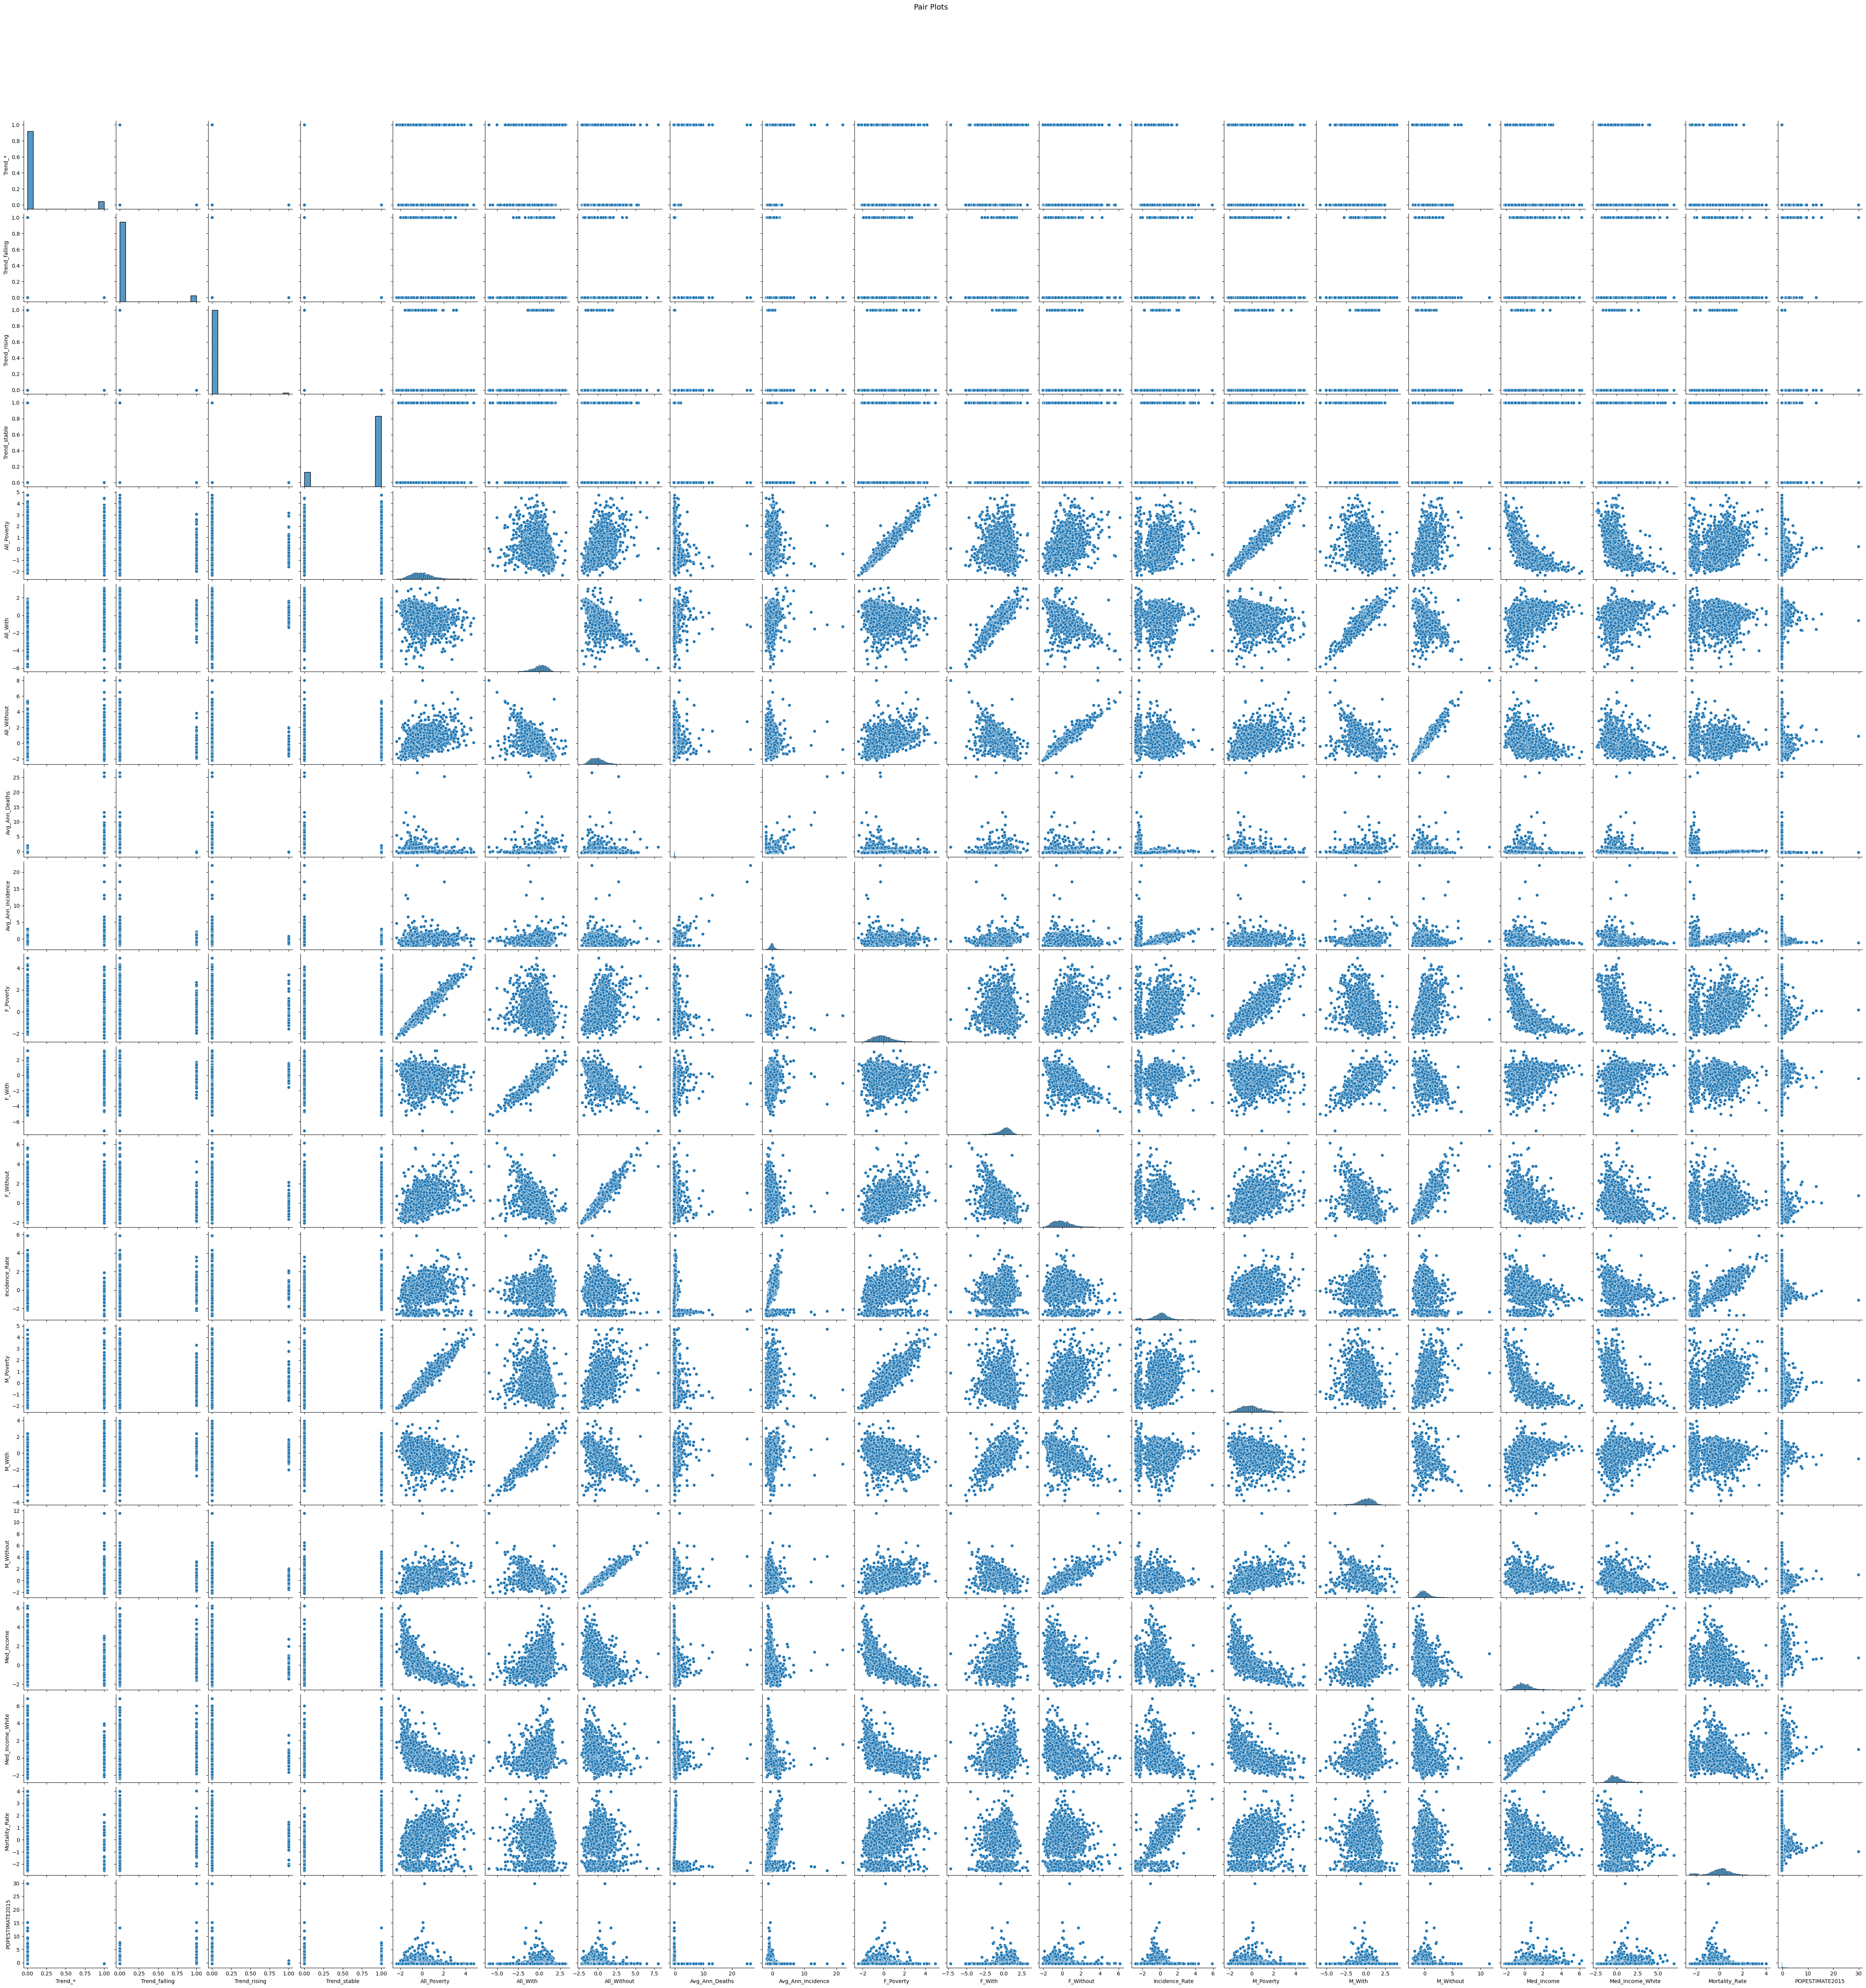

In [56]:
#plot out the pair plot
sns.pairplot(ready_final)
plt.gcf().suptitle("Pair Plots", fontsize=14, y=1.05)
plt.show()

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

In [57]:
#Define the correlation matrix
corr_matrix=ready_final.corr()

In [58]:
#check
corr_matrix

Trend_*  Trend_falling  Trend_rising  Trend_stable  \
Trend_*            1.000000      -0.083809     -0.037991     -0.685794   
Trend_falling     -0.083809       1.000000     -0.032914     -0.594135   
Trend_rising      -0.037991      -0.032914      1.000000     -0.269329   
Trend_stable      -0.685794      -0.594135     -0.269329      1.000000   
All_Poverty       -0.061412      -0.060396      0.009607      0.083561   
All_With          -0.090238       0.042873      0.045506      0.024840   
All_Without        0.160318      -0.049441     -0.026271     -0.079442   
Avg_Ann_Deaths     0.440369      -0.049284     -0.019550     -0.292834   
Avg_Ann_Incidence  0.020611      -0.060278     -0.002629      0.025559   
F_Poverty         -0.071108      -0.060734      0.006761      0.092008   
F_With            -0.182042       0.065928      0.035279      0.081927   
F_Without          0.131102      -0.054562     -0.025855     -0.054128   
Incidence_Rate    -0.642076       0.001119      0.006221      0.481337   
M_Poverty         -0.046925      -0.057039      0.012506      0.069470   
M_With             0.012464       0.014143      0.048869     -0.034478   
M_Without          0.178523      -0.041767     -0.025142     -0.098654   
Med_Income         0.005629       0.154393     -0.008158     -0.104745   
Med_Income_White   0.004721       0.169735     -0.010027     -0.113709   
Mortality_Rate    -0.596067       0.002367     -0.011802      0.451582   
POPESTIMATE2015   -0.093806       0.304356     -0.023425     -0.125047   

                   All_Poverty  All_With  All_Without  Avg_Ann_Deaths  \
Trend_*              -0.061412 -0.090238     0.160318        0.440369   
Trend_falling        -0.060396  0.042873    -0.049441       -0.049284   
Trend_rising          0.009607  0.045506    -0.026271       -0.019550   
Trend_stable          0.083561  0.024840    -0.079442       -0.292834   
All_Poverty           1.000000 -0.310652     0.526932       -0.008044   
All_With             -0.310652  1.000000    -0.702425       -0.025140   
All_Without           0.526932 -0.702425     1.000000        0.070753   
Avg_Ann_Deaths       -0.008044 -0.025140     0.070753        1.000000   
Avg_Ann_Incidence     0.148010  0.096760     0.001708        0.602987   
F_Poverty             0.981119 -0.303695     0.507579       -0.036076   
F_With               -0.180344  0.924519    -0.663382       -0.087368   
F_Without             0.516094 -0.696303     0.968287        0.032139   
Incidence_Rate        0.261525  0.039220    -0.078976       -0.266107   
M_Poverty             0.973422 -0.303689     0.524062        0.025544   
M_With               -0.392643  0.928267    -0.638400        0.039237   
M_Without             0.506660 -0.667575     0.972011        0.102974   
Med_Income           -0.760340  0.282057    -0.401077       -0.038890   
Med_Income_White     -0.595623  0.188567    -0.297470       -0.054346   
Mortality_Rate        0.295875  0.017581    -0.028782       -0.252022   
POPESTIMATE2015      -0.069332  0.015802    -0.035613       -0.073606   

                   Avg_Ann_Incidence  F_Poverty    F_With  F_Without  \
Trend_*                     0.020611  -0.071108 -0.182042   0.131102   
Trend_falling              -0.060278  -0.060734  0.065928  -0.054562   
Trend_rising               -0.002629   0.006761  0.035279  -0.025855   
Trend_stable                0.025559   0.092008  0.081927  -0.054128   
All_Poverty                 0.148010   0.981119 -0.180344   0.516094   
All_With                    0.096760  -0.303695  0.924519  -0.696303   
All_Without                 0.001708   0.507579 -0.663382   0.968287   
Avg_Ann_Deaths              0.602987  -0.036076 -0.087368   0.032139   
Avg_Ann_Incidence           1.000000   0.134756  0.102700  -0.025121   
F_Poverty                   0.134756   1.000000 -0.152890   0.512679   
F_With                      0.102700  -0.152890  1.000000  -0.664852   
F_Without                  -0.025121   0.512679 -0.664852   1.00000

In [59]:
def remove_redundant_columns(df, threshold=0.7, response_column='Mortality_Rate'):
    '''
    This method aims to remove columns that have correlation over 0.7. In statistics, correlation above 0.7 is defined as highly correlated
    Therefore, I follow the same steps to define those as highly correlated columns
    '''
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold) and column != response_column]
    df = df.drop(df[to_drop], axis=1)
    return df

In [60]:
#remove highly correlated columns
model = remove_redundant_columns(ready_final)

C:\Users\hongy\AppData\Local\Temp\ipykernel_15592\474400699.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [61]:
#check 
model

Trend_*  Trend_falling  Trend_rising  Trend_stable  All_Poverty  \
0           1              0             0             0     0.032384   
1           1              0             0             0    -1.194157   
2           0              0             0             1    -1.311323   
3           0              0             0             1     1.253399   
4           1              0             0             0    -1.353892   
...       ...            ...           ...           ...          ...   
3129        0              0             0             1    -0.788034   
3130        0              0             0             1    -1.456439   
3131        0              0             0             1    -0.421793   
3132        0              0             0             1    -0.423475   
3133        0              0             0             1    -0.487898   

      All_With  Avg_Ann_Deaths  Avg_Ann_Incidence  Incidence_Rate  \
0    -5.957950        1.539787          -0.643454       -2.356748   
1    -1.558609       -0.135398          -1.171144       -2.650383   
2    -0.366203       -0.317909          -0.984182       -0.165127   
3    -1.659081       -0.338452          -1.206095       -0.114060   
4     0.318946        1.142636           0.468800       -2.633360   
...        ...             ...                ...             ...   
3129  0.341422       -0.375394          -1.249989       -1.084331   
3130 -0.570692       -0.368413          -1.457562       -1.773734   
3131  0.259647       -0.379990          -1.304407       -1.433288   
3132 -0.262594       -0.183953          -0.384072       -0.654518   
3133 -0.114269       -0.206731          -0.740699       -0.871552   

      Mortality_Rate  POPESTIMATE2015  
0          -2.386206        -0.304305  
1          -2.117497        -0.297306  
2          -0.104814         0.571306  
3           0.474754        -0.261007  
4          -2.412550        -0.311566  
...              ...              ...  
3129       -1.100618        -0.181911  
3130       -1.063736        -0.245653  
3131       -1.432552        -0.252481  
3132       -0.584275        -0.289521  
3133       -0.305029        -0.292764  

[2925 rows x 11 columns]

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

#### Explaination
The ratio I chose was from our ch5 lab. This ratio is commonly used in machine learning.

In [62]:
#rename column Trend_*
model = model.rename(columns = {'Trend_*':'Trend_n'})

In [63]:
# Shuffle the dataset and reset the index
model = model.sample(frac=1, random_state = 1).reset_index(drop=True)

In [64]:
# Separate the last 25% as hold-out data (test data)
model_hold_out=model[int(0.75*len(model)):len(model)]

In [65]:
# Keep the first 75% as training+validation data
model=model[0:int(0.75*len(model))]


In [66]:
## Randomly selecting 2/3 of the accessible samples as training data (50% of the total samples)
np.random.seed(1)
train = np.random.choice(model.shape[0], int(2*model.shape[0]/3), replace=False)
len(train)

1462

In [67]:
# Creating a binary indicator for samples that are selected for training
select = np.in1d(range(model.shape[0]), train)
len(select)

2193

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

In [68]:
#Using ordinary least square
#I found Incidence_Rate is the most linear correlated factor to Mortality_Rate. Also, adding these dummy variables will not 
#reuslt in high curse of dimensionality
ols_model1 = smf.ols('Mortality_Rate~Incidence_Rate+Trend_falling+Trend_n+Trend_stable',data = model[select]).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     873.5
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                -1143.5
No. Observations:                1462   AIC:                             2297.
Df Residuals:                    1457   BIC:                             2323.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1355      0.111     -1.226      0.220      -0.352       0.081
Incidence_Rate     0.7693      0.019     40.827      0.000       0.732       0.806
Trend_falling      0.1323      0.123      1.073      0.283      -0.109       0.374
Trend_n           -0.2506      0.127     -1.978      0.048      -0.499      -0.002
Trend_stable       0.1570      0.112      1.406      0.160      -0.062       0.376
==============================================================================
Omnibus:                      645.536   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9234.094
Skew:                          -1.669   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#For this model, I want to check whether overfitting the model will result in an extremly low MSE, this could cause
#curse of dimensionality, but I just want to give it a try
ols_model2 = smf.ols('Mortality_Rate~Trend_n+Trend_falling+Trend_rising+Trend_stable+All_Poverty+All_With+Avg_Ann_Deaths+Incidence_Rate+POPESTIMATE2015',data = model[select]).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                -1121.6
No. Observations:                1462   AIC:                             2261.
Df Residuals:                    1453   BIC:                             2309.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1075      0.028     -3.881      0.000      -0.162      -0.053
Trend_n            -0.3492      0.061     -5.746      0.000      -0.468      -0.230
Trend_falling       0.1654      0.053      3.110      0.002       0.061       0.270
Trend_rising       -0.0581      0.089     -0.652      0.514      -0.233       0.117
Trend_stable        0.1345      0.032      4.265      0.000       0.073       0.196
All_Poverty         0.0922      0.015      6.121      0.000       0.063       0.122
All_With            0.0091      0.015      0.617      0.537      -0.020       0.038
Avg_Ann_Deaths      0.0020      0.015      0.132      0.895      -0.027       0.031
Incidence_Rate      0.7275      0.020     37.057      0.000       0.689       0.766
POPESTIMATE2015    -0.0259      0.012     -2.179      0.029      -0.049      -0.003
==============================================================================
Omnibus:                      650.048   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9643.220
Skew:                          -1.672   Prob(JB):                         0.00
Kurtosis:                      15.129   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
#As mentioned above, Incidence_Rate is the most linear correlated factor, I want to see if we just use this column, 
#is it good enough to predict
ols_model3 = smf.ols('Mortality_Rate~Incidence_Rate',data = model[select]).fit()
ols_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     3376.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:15:00   Log-Likelihood:                -1162.2
No. Observations:                1462   AIC:                             2328.
Df Residuals:                    1460   BIC:                             2339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0152      0.014     -1.083      0.279      -0.043       0.012
Incidence_Rate     0.8434      0.015     58.102      0.000       0.815       0.872
==============================================================================
Omnibus:                      730.032   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11066.934
Skew:                          -1.947   Prob(JB):                         0.00
Kurtosis:                      15.904   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

#### Strategy
I found model 1 is the best. Model 1 does not have too many predictors with a decent MSE value. Also, the R-squared is also not bad with 74.6% response rate. Also, a relatively low Cond. No. also indicated low multicolinarity in this model. Added to that, with additional predictors, it is not too flexible. Therefore, I beleve the model 1 is the best performing model in these three models. 

In [71]:
#Getting the MSE for the above three models
pred1 = ols_model1.predict(model)
pred2 = ols_model2.predict(model)
pred3 = ols_model3.predict(model)

square_error1 = (model['Mortality_Rate'] - pred1)**2
print('--------Validation MSE for model 1--------')
print('MSE:',np.mean(square_error1[~select]))

square_error2 = (model['Mortality_Rate'] - pred2)**2
print('--------Validation MSE for model 2--------')
print('MSE:',np.mean(square_error2[~select]))

square_error3 = (model['Mortality_Rate'] - pred3)**2
print('--------Validation MSE for model 3--------')
print('MSE:',np.mean(square_error3[~select]))

--------Validation MSE for model 1--------
MSE: 0.2400056626286712
--------Validation MSE for model 2--------
MSE: 0.23343299616040902
--------Validation MSE for model 3--------
MSE: 0.24457045222638557


## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

#### Strategy
My model did not have a predictor that has VIF >10. Thought the VIF for intercept is way higher than 10, it is not a predictor. However, if we are too concerned, we can force the model to have an intercept 0.

In [72]:
#Get VIF for the new model
X = ols_model1.model.exog
predictors = ols_model1.model.exog_names

# Calculate the VIF for each predictor
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print the VIF values for each predictor
for i, v in zip(predictors, vif):
    print(f"VIF for {i}: {v}")

VIF for Intercept: 63.58439361755297
VIF for Incidence_Rate: 1.7252230328129707
VIF for Trend_falling: 4.7603161830934155
VIF for Trend_n: 6.14889524496009
VIF for Trend_stable: 8.729126936865454


## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [73]:
test_pred = ols_model1.predict(model_hold_out)
square_error_test = (model_hold_out['Mortality_Rate'] - test_pred)**2

print('--------Validation MSE for final model on test--------')
print('MSE:',np.mean(square_error_test))

--------Validation MSE for final model on test--------
MSE: 0.24767570435740774


## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

As discussed in lecture, Random Forest is one of the best and most accurate machine learning tools in supervised learning. Also, it is able handle non-linear pattern exists in the data, since I do not know what is the actual pattern, it is a worthy try to use RF. Also, RF can handle multicolinarity, which is what I need in using thses feature since I believe they do have multicolinarity. Last but not the least, the error for RF decrease and stays almost constant and relatively low level when increasing the number of trees, which is also a good characteristics. 

In [74]:
model[select]['Mortality_Rate']

0       0.379916
1      -1.174381
2      -2.317711
3       0.754001
5      -2.280830
          ...   
2183    0.569593
2184    0.806689
2186    0.232389
2188    0.274540
2190    0.659162
Name: Mortality_Rate, Length: 1462, dtype: float64

In [75]:
X_train = model[select].drop('Mortality_Rate', axis = 1)
y_train = model[select]['Mortality_Rate']
X_test = model[~select].drop('Mortality_Rate', axis = 1)
y_test = model[~select]['Mortality_Rate']

X_holdout = model_hold_out.drop('Mortality_Rate', axis = 1)
y_holdout = model_hold_out['Mortality_Rate']

In [76]:
from sklearn.ensemble import RandomForestRegressor
# Train a Random Forest Regressor
regr = RandomForestRegressor(max_features = 4, random_state=1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_features=4, random_state=1)

In [77]:
#get the mse for validation set to see if it is overfitted
y_pred = regr.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1451527236616378


In [78]:
#check the performance on hold out set
y_pred_h = regr.predict(X_holdout)
mse_h = mean_squared_error(y_holdout, y_pred_h)
print("Mean Squared Error:", mse_h)

Mean Squared Error: 0.14165045436662288


In [79]:
#check if RF provides a lower MSE than the final model.
mse_h<np.mean(square_error_test)

True